<a href="https://colab.research.google.com/github/IndujaSuresh/Travelling-Salesman/blob/main/aot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Representation:permutation Representation
#Recombination:Order crossover
#Recombination Probability:100%
#Mutation:Scramble
#Mutation Probability:50%
#Parent Selection:Best fit 6 individual from current generation
#Survival Selection:Replace Worst
#Number Of Offspring:2
#Initalization:Random 10 Parents
#Termination Condition:fitness <= 13





In [1]:
import pandas as pd
import numpy as np
import random
from numpy import random

In [2]:
cities = [0, 1, 2, 3, 4,5,6]

adjacency_mat = [ [ 0, 8, 2, 3, 7, 2, 5 ],
                  [ 8, 0, 3, 5, 1, 8, 2 ],
                  [ 2, 3, 0, 2, 2, 6, 8 ],
                  [ 3, 5, 2, 0, 6, 2, 2 ],
                  [ 7, 1, 2, 6, 0, 3, 5 ],
                  [ 2, 8, 6, 2, 3, 0, 1 ],
                  [ 5, 2, 8, 2, 5, 1, 0 ] ]

In [3]:
def population(cities,n):
 for i in range(n):
    popu.loc[i] = np.random.permutation(cities)   
 return (popu)

In [4]:
import random
def scramble(child,rate):
    #select a random set and scramble the cities in it
    l,r = sorted(random.sample(range(0, len(child)), 2))
    sett = child[l:r]
    y = np.random.rand()
    if(y<rate):
      random.shuffle(sett)
      child[l:r] = sett
    return child

In [5]:
import random
from itertools import chain
def crossover(P1, P2):
    """Implements ordered crossover"""

    #size = len(mum)-1

    # Choose random start/end position for crossover
    C1, C2 = [-1] * 7, [-1] * 7
    start, end = sorted([random.randrange(7) for _ in range(2)])
    #print('start:',start)
    #print('end:',end)

    # Replicate mum's sequence for alice, dad's sequence for bob
    for i in range(start, end + 1):
        C1[i] = P1[i]
        C2[i] = P2[i]

    # # Fill the remaining position with the other parents' entries
    current_P2, current_P1 = 0, 0
    #
    for i in chain(range(start), range(end + 1, 7)):
    #
         while current_P2 < 7 and P2[current_P2] in C1:
            current_P2 += 1

         while current_P1 < 7 and P1[current_P1] in C2:
           current_P1 += 1
    #
         C1[i] = P2[current_P2]
         C2[i] = P1[current_P1]
    #
    # # Return twins
    # return graph.Tour(self.g, alice), graph.Tour(self.g, bob)
    #print("Alice:",alice)
    #print("Bob:",bob)
    C1 = scramble(C1,0.5)
    C2 = scramble(C2,0.5)
    return (C1, C2)

In [6]:
def fitness(X):
    distance = 0
    distance =adjacency_mat[int(X[0])][int(X[1])] + adjacency_mat[int(X[1])][int(X[2])] + adjacency_mat[int(X[2])][int(X[3])]+adjacency_mat[int(X[3])][int(X[4])] + adjacency_mat[int(X[4])][int(X[5])] + adjacency_mat[int(X[5])][int(X[6])] + adjacency_mat[int(X[6])][int(X[0])]
    return(distance)

In [7]:
fitness_count =[]
generation_count =[]

In [8]:
count_fitness=0
count_generation = 0

In [9]:
data = {'1st': [],
        '2nd': [],
        '3rd': [],
        '4th': [],
        '5th': [],
        '6th': [],
        '7th': []}
popu = pd.DataFrame(data)
population(cities,10)
print("Initial parents:")
print(popu)
n=len(popu)-1
for i in range(n):
    P1,P2 = crossover(popu.iloc[i],popu.iloc[i+1])
    popu.loc[len(popu)] = P1 #Adding new children to the population
    popu.loc[len(popu)] = P2

distance = []
for i in range(len(popu)):
    distance = np.append(distance,fitness(popu.loc[i]))
    count_fitness = count_fitness + 1
#print(distance)
popu['Fitness'] = distance
popu = popu.sort_values(by=['Fitness'], ascending=True)
popu = popu.drop_duplicates()
popu = popu.head(10)
popu = popu.reset_index()
popu = popu.drop(['index'],axis=1)
count_generation = count_generation +1
print("\nBest fit 5 of generation{0} are:".format(int(count_generation)))
print(popu.head())

while(int(popu.loc[0].Fitness)>13):
  count_generation = count_generation +1 

  n=len(popu)-1
  for i in range(n):
    P1,P2 = crossover(popu.iloc[i],popu.iloc[i+1])
    P1 = np.append(P1,fitness(P1))
    #print("P1:",P1)
    count_fitness =count_fitness+1   
    #print("Popu:",popu)
    popu.loc[len(popu)] = P1 #Adding new children to the population
    
    P2 = np.append(P2,fitness(P2))
    count_fitness =count_fitness+1 
    popu.loc[len(popu)] = P2
  popu = popu.sort_values(by=['Fitness'], ascending=True)
  popu = popu.drop_duplicates()
  print("\nBest fit 5 of generation{0} are:".format(int(count_generation)))
  popu = popu.head(10)
  popu = popu.reset_index()
  popu = popu.drop(['index'],axis=1)
  print(popu.head())
  print("\nFitness checked {0} times:".format(int(count_fitness)))
  print("\nNumber of generations created {0} times".format(int(count_generation)))
  fitness_count = np.append(fitness_count,count_fitness)
  generation_count = np.append(generation_count,count_generation)

Initial parents:
   1st  2nd  3rd  4th  5th  6th  7th
0  2.0  5.0  3.0  6.0  1.0  0.0  4.0
1  3.0  0.0  6.0  5.0  2.0  4.0  1.0
2  5.0  2.0  0.0  1.0  6.0  3.0  4.0
3  0.0  5.0  1.0  3.0  4.0  2.0  6.0
4  3.0  2.0  5.0  4.0  6.0  0.0  1.0
5  6.0  2.0  3.0  5.0  4.0  0.0  1.0
6  5.0  0.0  4.0  2.0  1.0  3.0  6.0
7  1.0  0.0  6.0  5.0  4.0  2.0  3.0
8  4.0  5.0  6.0  1.0  3.0  0.0  2.0
9  0.0  3.0  5.0  4.0  2.0  1.0  6.0

Best fit 5 of generation1 are:
   1st  2nd  3rd  4th  5th  6th  7th  Fitness
0  4.0  5.0  6.0  1.0  3.0  0.0  2.0     18.0
1  0.0  3.0  5.0  4.0  2.0  1.0  6.0     20.0
2  5.0  0.0  4.0  2.0  1.0  3.0  6.0     22.0
3  0.0  5.0  3.0  4.0  2.0  1.0  6.0     22.0
4  3.0  0.0  6.0  5.0  2.0  4.0  1.0     23.0

Best fit 5 of generation2 are:
   1st  2nd  3rd  4th  5th  6th  7th  Fitness
0  5.0  0.0  2.0  4.0  1.0  3.0  6.0     15.0
1  4.0  5.0  6.0  1.0  3.0  0.0  2.0     18.0
2  5.0  0.0  4.0  1.0  2.0  3.0  6.0     18.0
3  0.0  3.0  5.0  4.0  2.0  1.0  6.0     20.0
4  0.0

In [10]:
count = 0
while(count<20):
  count_fitness=0
  count_generation = 0
  time_taken= 0  
  data = {'1st': [],
        '2nd': [],
        '3rd': [],
        '4th': [],
        '5th': [],
        '6th': [],
        '7th': []}
  popu = pd.DataFrame(data)
  population(cities,10)
  #print("Initial parents:")
 # print(popu)
  n=len(popu)-1
  for i in range(n):
    P1,P2 = crossover(popu.iloc[i],popu.iloc[i+1])
    popu.loc[len(popu)] = P1 #Adding new children to the population
    popu.loc[len(popu)] = P2

  distance = []
  for i in range(len(popu)):
    distance = np.append(distance,fitness(popu.loc[i]))
    count_fitness = count_fitness + 1
  popu['Fitness'] = distance
  popu = popu.sort_values(by=['Fitness'], ascending=True)
  popu = popu.drop_duplicates()
  popu = popu.head(10)
  popu = popu.reset_index()
  popu = popu.drop(['index'],axis=1)
  count_generation = count_generation +1
  #print("\nBest fit 5 of generation{0} are:".format(int(count_generation)))
  #print(popu.head())
  while(int(popu.loc[0].Fitness)>13):
    count_generation = count_generation +1 

    n=len(popu)-1
    for i in range(n):
      P1,P2 = crossover(popu.iloc[i],popu.iloc[i+1])
      P1 = np.append(P1,fitness(P1))
      count_fitness =count_fitness+1   
      popu.loc[len(popu)] = P1 #Adding new children to the population
      #print(popu)
      P2 = np.append(P2,fitness(P2))
      count_fitness =count_fitness+1 
      popu.loc[len(popu)] = P2
    popu = popu.sort_values(by=['Fitness'], ascending=True)
    popu = popu.drop_duplicates()
    #print("\nBest fit 5 of generation{0} are:".format(int(count_generation)))
    popu = popu.head(10)
    popu = popu.reset_index()
    popu = popu.drop(['index'],axis=1)
   # print(popu.head())
   # print("\nFitness checked {0} times:".format(int(count_fitness)))
   # print("\nNumber of generations created {0} times".format(int(count_generation)))
    count=count+1
    fitness_count = np.append(fitness_count,count_fitness)
    generation_count = np.append(generation_count,count_generation)

In [11]:
print("\n Fitness count of during 20 iterations: ", fitness_count)
print("\n Generation count of during 20 iterations: ", generation_count)
print("\n Average fitness count: ",np.mean(fitness_count))
print("\n Average generation count: ",np.mean(generation_count))


 Fitness count of during 20 iterations:  [ 46.  64.  46.  64.  82. 100.  46.  64.  82. 100. 118. 136. 154. 172.
 190.  46.  64.  82.  46.  64.  82.  46.  64.  82. 100. 118.]

 Generation count of during 20 iterations:  [ 2.  3.  2.  3.  4.  5.  2.  3.  4.  5.  6.  7.  8.  9. 10.  2.  3.  4.
  2.  3.  4.  2.  3.  4.  5.  6.]

 Average fitness count:  86.84615384615384

 Average generation count:  4.269230769230769


In [12]:

np.std(fitness_count)

39.48582248750547

In [13]:
np.std(generation_count)

2.1936568048614156

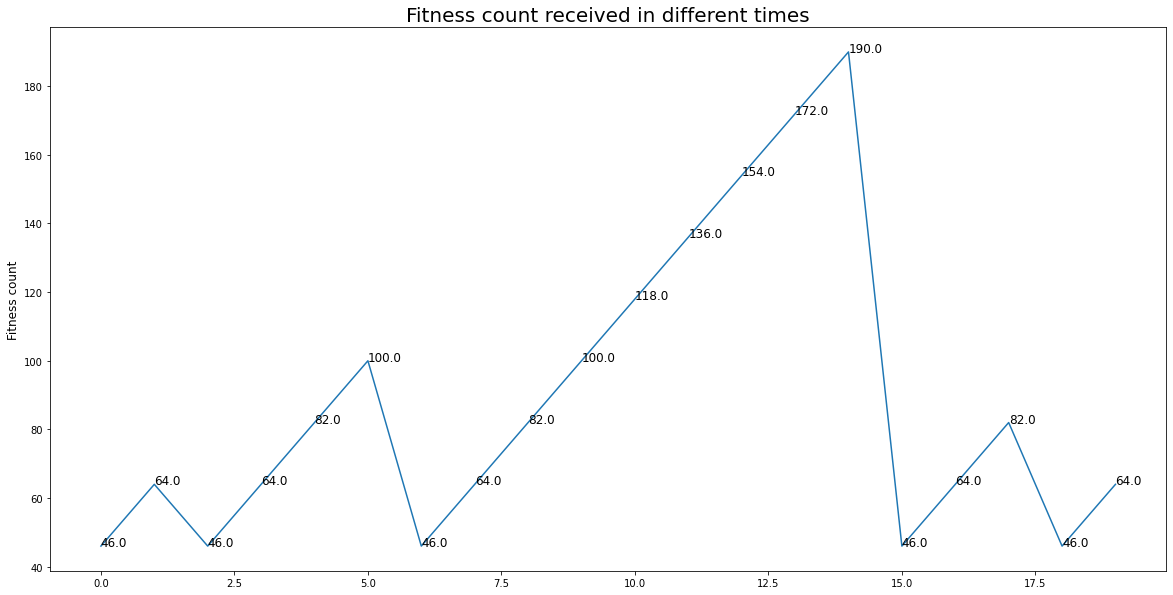

In [14]:
import matplotlib.pyplot as plt
fig ,ax = plt.subplots(figsize=(20,10))
x = np.arange(20)
plt.title("Fitness count received in different times",size = 20)
plt.ylabel("Fitness count",size = 12)
y = fitness_count[x]
plt.plot(x,y)
for index in range(len(x)):
  ax.text(x[index],y[index],y[index],size=12)
plt.show()

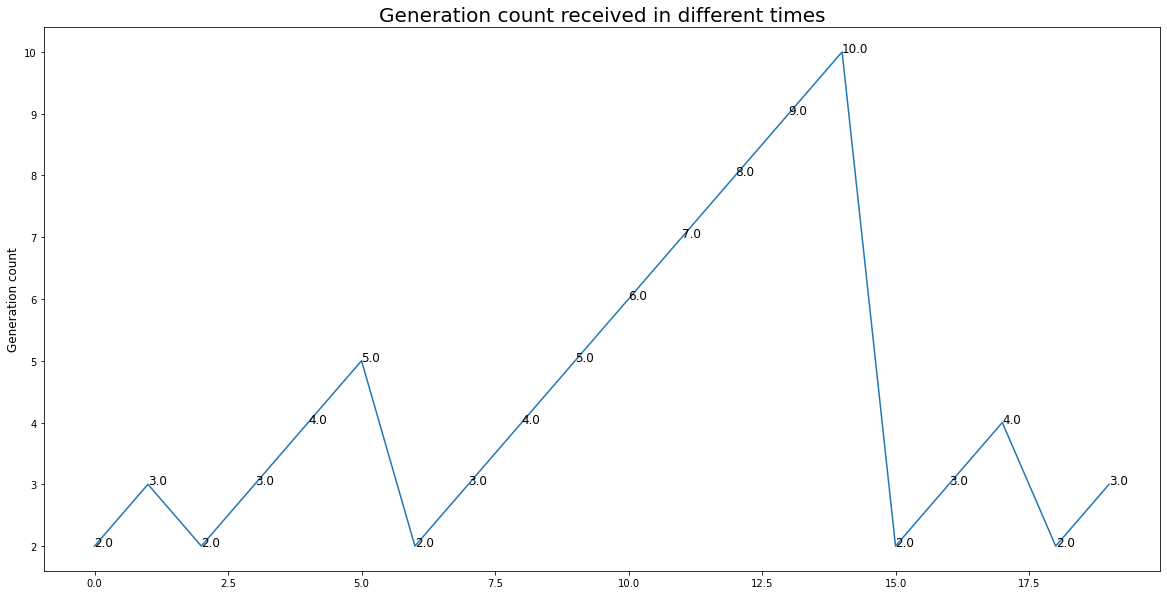

In [15]:
fig ,ax = plt.subplots(figsize=(20,10))
x = np.arange(20)
plt.title("Generation count received in different times",size = 20)
plt.ylabel("Generation count",size = 12)
y = generation_count[x]
plt.plot(x,y)
for index in range(len(x)):
  ax.text(x[index],y[index],y[index],size=12)
plt.show()

In [16]:
from prettytable import PrettyTable

myTable = PrettyTable([" ","Mean","Median","Standard Deviation"])

myTable.add_row(["Fitness Count",np.mean(fitness_count),np.median(fitness_count),np.std(fitness_count)])
myTable.add_row(["Generation Count",np.mean(generation_count),np.median(generation_count),np.std(generation_count)])
print(myTable)

+------------------+-------------------+--------+--------------------+
|                  |        Mean       | Median | Standard Deviation |
+------------------+-------------------+--------+--------------------+
|  Fitness Count   | 86.84615384615384 |  82.0  | 39.48582248750547  |
| Generation Count | 4.269230769230769 |  4.0   | 2.1936568048614156 |
+------------------+-------------------+--------+--------------------+
